# Final Project

## 把 table groupby
* day
* hour

In [1]:
import warnings; warnings.simplefilter('ignore')
import numpy as np
import json
import pandas as pd
from pandas.io.json import json_normalize

## Read File

In [2]:
filename = 'pm25_complete.csv'
df = pd.read_csv(filename)
df = df.dropna()
df = df.drop(columns=['SiteName', 'date'])
df

,hour,s_h0,s_t0,s_d0_b1,s_d0_b2,s_d0_b3,s_d0,s_d1,s_d2
3,18,100.000000,20.584000,1.857143,1.588235,1.642857,0.300000,0.000000,0.000000
4,19,100.000000,20.575000,0.300000,1.857143,1.588235,2.000000,0.000000,0.000000
5,20,100.000000,20.367368,2.000000,0.300000,1.857143,0.315789,0.000000,0.000000
6,21,100.000000,20.250000,0.315789,2.000000,0.300000,1.923077,0.000000,0.000000
7,23,100.000000,20.397857,1.923077,0.315789,2.000000,5.357143,0.000000,0.000000
8,0,100.000000,20.532727,5.357143,1.923077,0.315789,3.727273,0.000000,0.000000
9,1,100.000000,20.750000,3.727273,5.357143,1.923077,6.000000,0.000000,0.000000
10,2,100.000000,21.199444,6.000000,3.727273,5.357143,3.388889,0.000000,0.000000
11,3,100.000000,21.250000,3.388889,6.000000,3.727273,2.000000,0.000000,0.000000
12,4,100.000000,21.750000,2.000000,3.388889,6.000000,0.000000,0.000000,0.000000


## Visualization

In [3]:
import seaborn as sns
import matplotlib.pyplot as plt

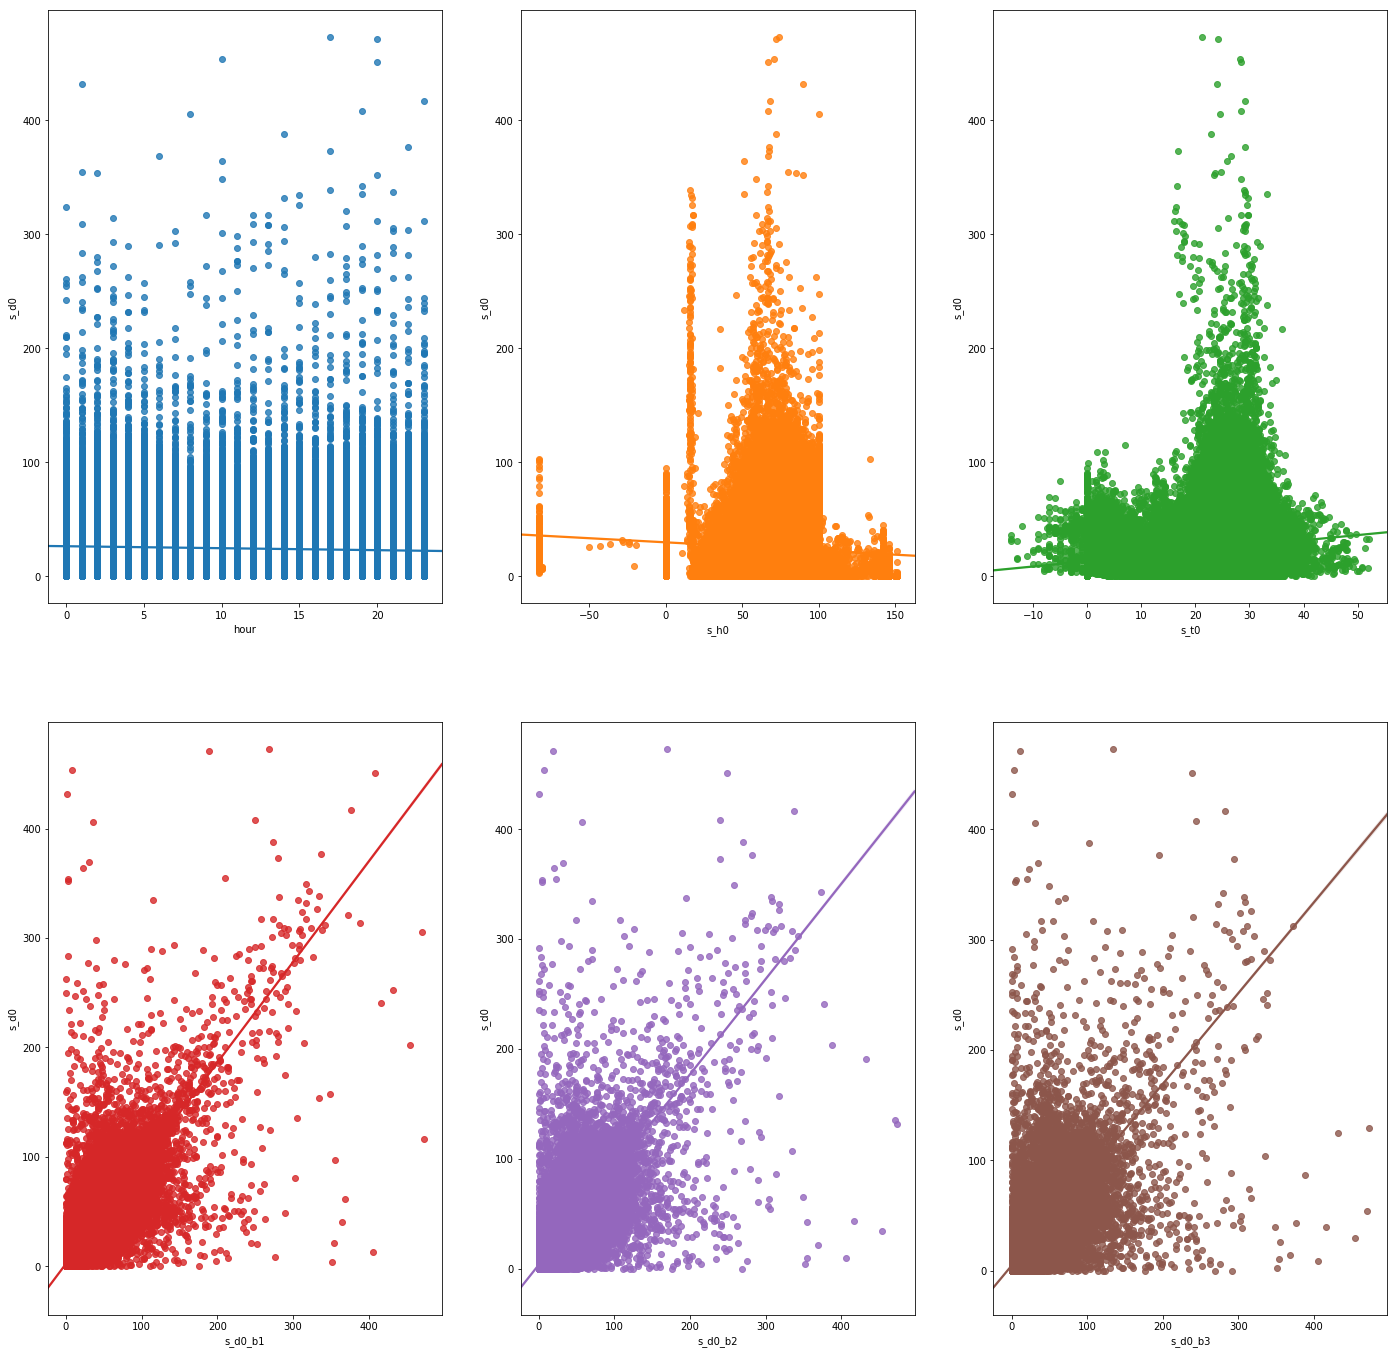

In [4]:
# Create a figure instance, and the two subplots
inputNum = len(df.columns)-3

#sns.set(font_scale=2)
fig, axes = plt.subplots(2, 3, figsize=(24, 24))


for i in range(0, 2):
    for j in range(0, 3):
        sns.regplot(x=df.columns[i*3+j], y=df.columns[inputNum], data=df, ax=axes[i][j])

#plt.show()

## standardization

In [5]:
from sklearn.preprocessing import StandardScaler

np_scaled = StandardScaler().fit_transform(df)
df = pd.DataFrame(np_scaled, columns=df.columns)
df.head()

,hour,s_h0,s_t0,s_d0_b1,s_d0_b2,s_d0_b3,s_d0,s_d1,s_d2
0,0.947272,1.478326,-0.925826,-1.104995,-1.113292,-1.105243,-1.186842,-1.159696,-1.208202
1,1.090625,1.478326,-0.927982,-1.181576,-1.100068,-1.107927,-1.103216,-1.159696,-1.208202
2,1.233978,1.478326,-0.977711,-1.097969,-1.176645,-1.094711,-1.186066,-1.159696,-1.208202
3,1.377330,1.478326,-1.005821,-1.180800,-1.093042,-1.171240,-1.107000,-1.159696,-1.208202
4,1.664035,1.478326,-0.970408,-1.101753,-1.175869,-1.087690,-0.938071,-1.159696,-1.208202


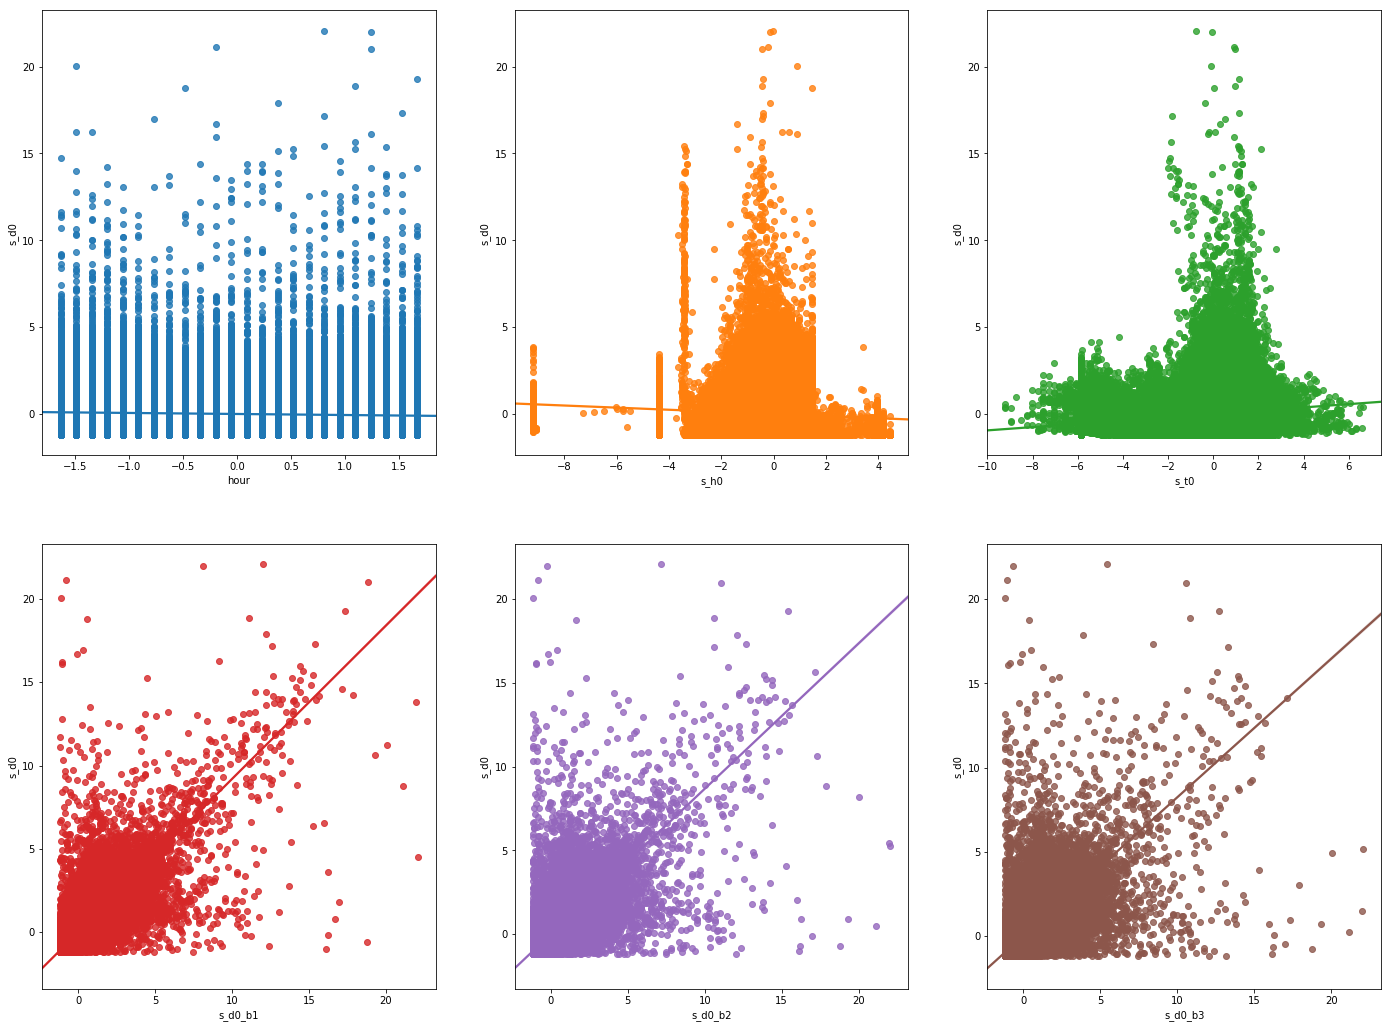

In [6]:
# Create a figure instance, and the two subplots
inputNum = len(df.columns)-3

#sns.set(font_scale=2)
fig, axes = plt.subplots(2, 3, figsize=(24, 18))


for i in range(0, 2):
    for j in range(0, 3):
        sns.regplot(x=df.columns[i*3+j], y=df.columns[inputNum], data=df, ax=axes[i][j])

#plt.show()